In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv(r'Softec_Patient_Data_Training_Kaggle_V1_cleaned_final_v1.csv')

In [30]:
df_race = pd.read_csv(r'high-cost-diabetes-patients-prediction/Softec_Patient_Data_Training_Kaggle_V1.csv')

In [36]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df_race.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for col in categorical_cols:
    df_race[col + '_encoded'] = label_encoder.fit_transform(df_race[col])

# Drop original categorical columns
df_race.drop(categorical_cols, axis=1, inplace=True)
df_race = df_race

In [37]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16328 entries, 0 to 16327
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           16328 non-null  int64  
 1   Age                          16328 non-null  int64  
 2   Zip Code                     16328 non-null  int64  
 3   Enrollment Type Categorized  16328 non-null  int64  
 4   Enrollment Months            16328 non-null  float64
 5   HCC Score                    16254 non-null  float64
 6   Avg. LOS                     16328 non-null  float64
 7   Diagnosis                    16328 non-null  int64  
 8   # Total Claims               16328 non-null  int64  
 9   # Hospital OP                16328 non-null  int64  
 10  # All Physician OP           16328 non-null  int64  
 11  # Inpatient                  15947 non-null  float64
 12  # Short Term Stay Hospital   16328 non-null  int64  
 13  # Long Term Stay

In [38]:
df['Race_encoded'] = df_race['Race_encoded']

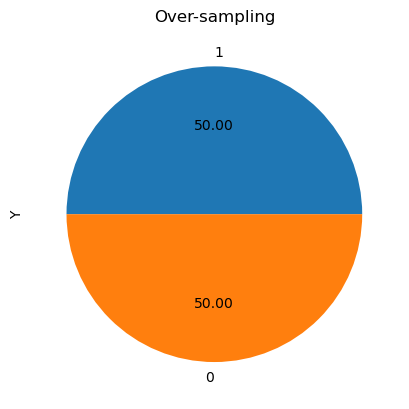

In [42]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(df.drop('Y',axis=1), df['Y'])
df = X_res
df['Y'] = y_res
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [24]:
df['Y'].value_counts()

0    12200
1     4128
Name: Y, dtype: int64

In [33]:
# Race_Asian                               16328 non-null  int64  
#  41  Race_Black                               16328 non-null  int64  
#  42  Race_Hispanic                            16328 non-null  int64  
#  43  Race_North American Native               16328 non-null  int64  
#  44  Race_Other Race                          16328 non-null  int64  
#  45  Race_UnKnown                             16328 non-null  int64  
#  46  Race_White 
df.drop(['Race_Black','Race_Hispanic','Race_North American Native','Race_Other Race','Race_UnKnown','Race_White'],axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16328 entries, 0 to 16327
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       16328 non-null  int64  
 1   Age                                      16328 non-null  int64  
 2   Sex                                      16328 non-null  int64  
 3   Zip Code                                 16328 non-null  int64  
 4   Enrollment Type Categorized              16328 non-null  int64  
 5   Enrollment Months                        16328 non-null  float64
 6   HCC Score                                16328 non-null  int64  
 7   Avg. LOS                                 16328 non-null  float64
 8   Diagnosis                                16328 non-null  int64  
 9   # Total Claims                           16328 non-null  int64  
 10  # Hospital OP                            16328

In [7]:
df['Avg ADI'].value_counts()

75.333333    801
84.600000    566
75.354839    520
61.482759    492
71.838710    397
            ... 
59.000000      1
63.080000      1
58.071429      1
32.222222      1
89.400000      1
Name: Avg ADI, Length: 497, dtype: int64

In [8]:
df['Avg ADI'].fillna(df['Avg ADI'].mean(),inplace=True)

In [9]:
df['Max ADI'].fillna(df['Max ADI'].mean(),inplace=True)

In [10]:
df['Min ADI'].fillna(df['Min ADI'].mean(),inplace=True)

In [11]:
#  59  SVI1                                    
#  60  SVI3                                    
#  61  SVI4

In [12]:
df['SVI1'].value_counts()

-35.236656    2483
 0.281248     1941
-20.122837    1650
-14.360588    1265
-16.845823    1251
              ... 
-13.124560       1
 0.625567        1
 0.537937        1
 0.504070        1
 0.585560        1
Name: SVI1, Length: 111, dtype: int64

In [13]:
df['SVI1'].fillna(df['SVI1'].mean(),inplace=True)
df['SVI3'].fillna(df['SVI3'].mean(),inplace=True)
df['SVI4'].fillna(df['SVI4'].mean(),inplace=True)

In [14]:
df['SVI'].value_counts()

-94.703669    2483
 0.375466     1941
-28.376737    1650
-14.387013    1265
-19.696800    1251
              ... 
-13.104508       1
 0.524300        1
 0.529600        1
 0.502500        1
 0.642560        1
Name: SVI, Length: 111, dtype: int64

In [15]:
df['SVI'].fillna(df['SVI'].mean(),inplace=True)


In [16]:
df['MDI'].value_counts()

14.16    12954
15.39     2845
14.69      287
15.86       30
14.81       11
22.05        7
20.80        6
13.73        5
18.81        4
10.22        4
12.30        4
18.80        2
10.34        2
14.93        2
12.70        2
13.98        2
16.60        2
15.80        1
24.32        1
17.64        1
24.58        1
15.60        1
12.82        1
18.10        1
14.59        1
15.06        1
15.71        1
20.65        1
Name: MDI, dtype: int64

In [17]:
df['MDI'].fillna(14.16,inplace=True)

In [43]:
df.to_csv(r'Softec_Patient_Data_Training_Kaggle_V1_cleaned_final_v3_oversampled.csv',index=False)